In [1]:
### 문제 ###
# 지역에 따라서 선호하는 게임 장르가 다를까?
# 연도별 게임의 트렌드가 있을까?
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함
# 2016년 플랫폼마다 출고량이 많은 장르가 있을까?
# 다음 분기에 어떤 게임을 설계해야 할까?

In [2]:
# 데이터셋 불러오기


from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df

Mounted at /content/drive


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# Name : 게임의 이름입니다.
# Platform : 게임이 지원되는 플랫폼의 이름입니다.
# Year : 게임이 출시된 연도입니다.
# Genre : 게임의 장르입니다.
# Publisher : 게임을 제작한 회사입니다.
# NA_Sales : 북미지역에서의 출고량입니다.
# EU_Sales : 유럽지역에서의 출고량입니다.
# JP_Sales : 일본지역에서의 출고량입니다.
# Other_Sales : 기타지역에서의 출고량입니다.
# All_Sales : 모든지역에서의 출고량입니다.

In [3]:
# 데이터 가공

df1=df.drop(df.columns[0],axis=1)

df1.isna().sum()
df1=df1.dropna()
df1.isna().sum()

df1=df1.reset_index(drop=True)

import datetime
import numpy as np

def tofourdigits(a):
  b=str(int(a))
  if len(b) == 2:
    if int(a)>=50:
      result='19'+b
    else:
      result='20'+b
  elif len(b) == 1:
    result='200'+b
  else:
    result=b
  return result

df1['Year']=df1['Year'].apply(tofourdigits)

def tofloat(a):
  if 'M' in a:
    a=a.replace('M','')
    result = float(a)
  elif 'K' in a:
    a=a.replace('K','')
    result = float(a)*0.001
  else:
    result = float(a)
  return result

df1['NA_Sales']=df1['NA_Sales'].apply(tofloat)
df1['EU_Sales']=df1['EU_Sales'].apply(tofloat)
df1['JP_Sales']=df1['JP_Sales'].apply(tofloat)
df1['Other_Sales']=df1['Other_Sales'].apply(tofloat)

df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 지역에 따라서 선호하는 게임 장르가 다를까
df21=df1.groupby('Genre')[['NA_Sales']].sum()
df22=df1.groupby('Genre')[['EU_Sales']].sum()
df23=df1.groupby('Genre')[['JP_Sales']].sum()
df24=df1.groupby('Genre')[['Other_Sales']].sum()
df2=pd.concat([df21,df22,df23,df24],axis=1)
df2=df2.T
df2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,858.75,101.79,220.35,394.73,445.38,121.58,354.70,318.76,574.48,181.43,667.26,67.83
EU_Sales,513.64,63.66,99.90,208.15,200.63,50.47,235.02,183.09,310.23,112.99,370.97,44.82
JP_Sales,156.60,51.87,87.14,104.18,130.53,56.24,56.32,342.93,38.18,63.54,134.76,49.10
Other_Sales,183.99,16.70,36.15,72.64,51.45,12.44,76.51,56.73,101.86,31.32,132.35,11.23


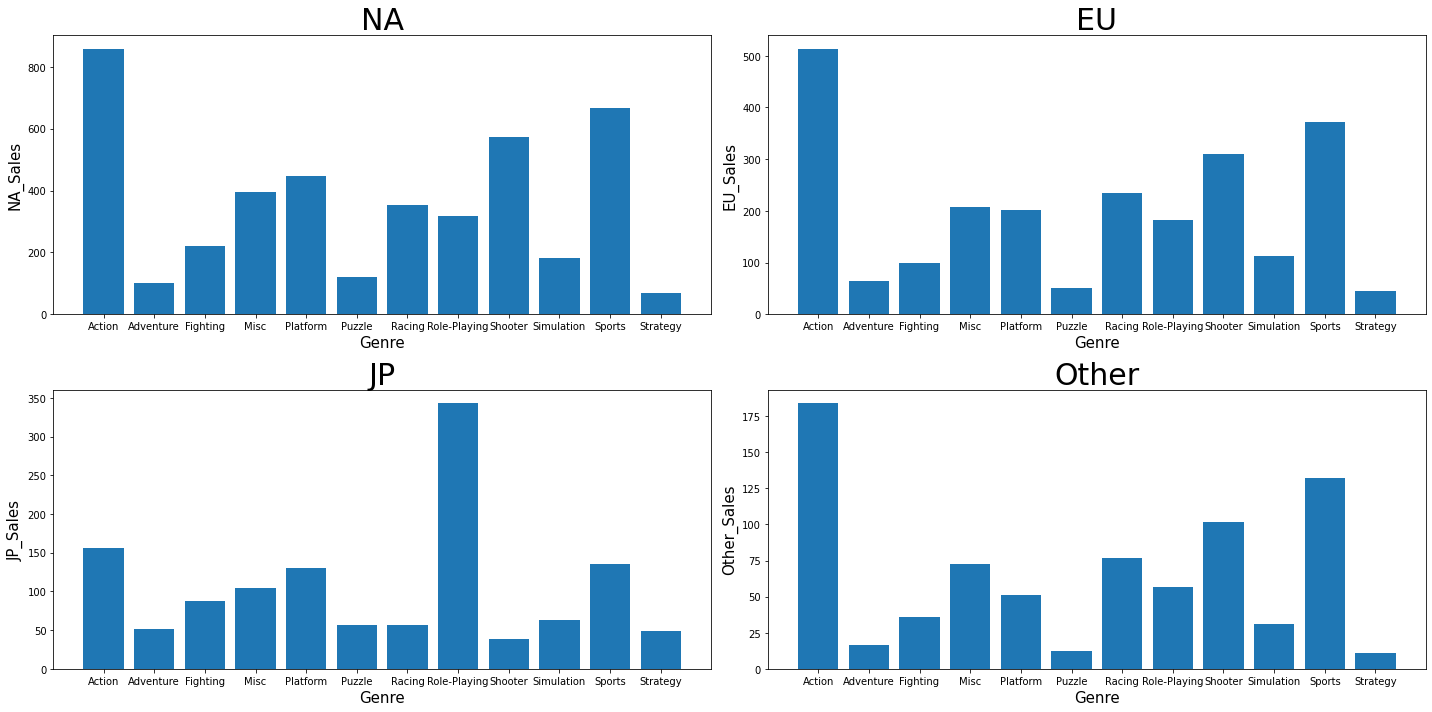

In [6]:
# 지역에 따라서 선호하는 게임 장르가 다를까 - 시각화
import matplotlib.pyplot as plt

df211=df21.reset_index()
df221=df22.reset_index()
df231=df23.reset_index()
df241=df24.reset_index()

fig, ax = plt.subplots(2, 2)
plt.rcParams["figure.figsize"] = (20,10)

ax[0,0].bar(df211['Genre'], df211['NA_Sales'])
ax[0,0].set_title('NA',fontsize=30)
ax[0,0].set_xlabel('Genre',fontsize=15)
ax[0,0].set_ylabel('NA_Sales',fontsize=15)

ax[0,1].bar(df221['Genre'], df221['EU_Sales'])
ax[0,1].set_title('EU',fontsize=30)
ax[0,1].set_xlabel('Genre',fontsize=15)
ax[0,1].set_ylabel('EU_Sales',fontsize=15)

ax[1,0].bar(df231['Genre'], df231['JP_Sales'])
ax[1,0].set_title('JP',fontsize=30)
ax[1,0].set_xlabel('Genre',fontsize=15)
ax[1,0].set_ylabel('JP_Sales',fontsize=15)

ax[1,1].bar(df241['Genre'], df241['Other_Sales'])
ax[1,1].set_title('Other',fontsize=30)
ax[1,1].set_xlabel('Genre',fontsize=15)
ax[1,1].set_ylabel('Other_Sales',fontsize=15)

fig.tight_layout()
plt.show()

# 전체년도에 대해서 NA, EU, 기타 지역은 'Action' 장르를 선호하고 JP 지역은 'Role-Playing' 장르를 선호합니다.

In [7]:
# 연도별 게임의 트렌드가 있을까
import warnings
warnings.filterwarnings(action='ignore')

df3=df1[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df3['All_Sales']=df3['EU_Sales']+df3['JP_Sales']+df3['NA_Sales']+df3['Other_Sales']
df3=df3[['Year','Genre','All_Sales']]
df3=df3.groupby(['Year','Genre']).sum()
df3

All_Sales
Year Genre                  
1980 Action             0.34
     Fighting           0.77
     Misc               2.70
     Shooter            7.07
1981 Action            14.79
...                      ...
2016 Sports            14.63
     Strategy           0.52
2017 Action             0.01
     Role-Playing       0.04
2020 Simulation         0.29

[388 rows x 1 columns]

In [8]:
# 연도마다 데이터 개수 확인
df1['Year'].value_counts()

2009    1428
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

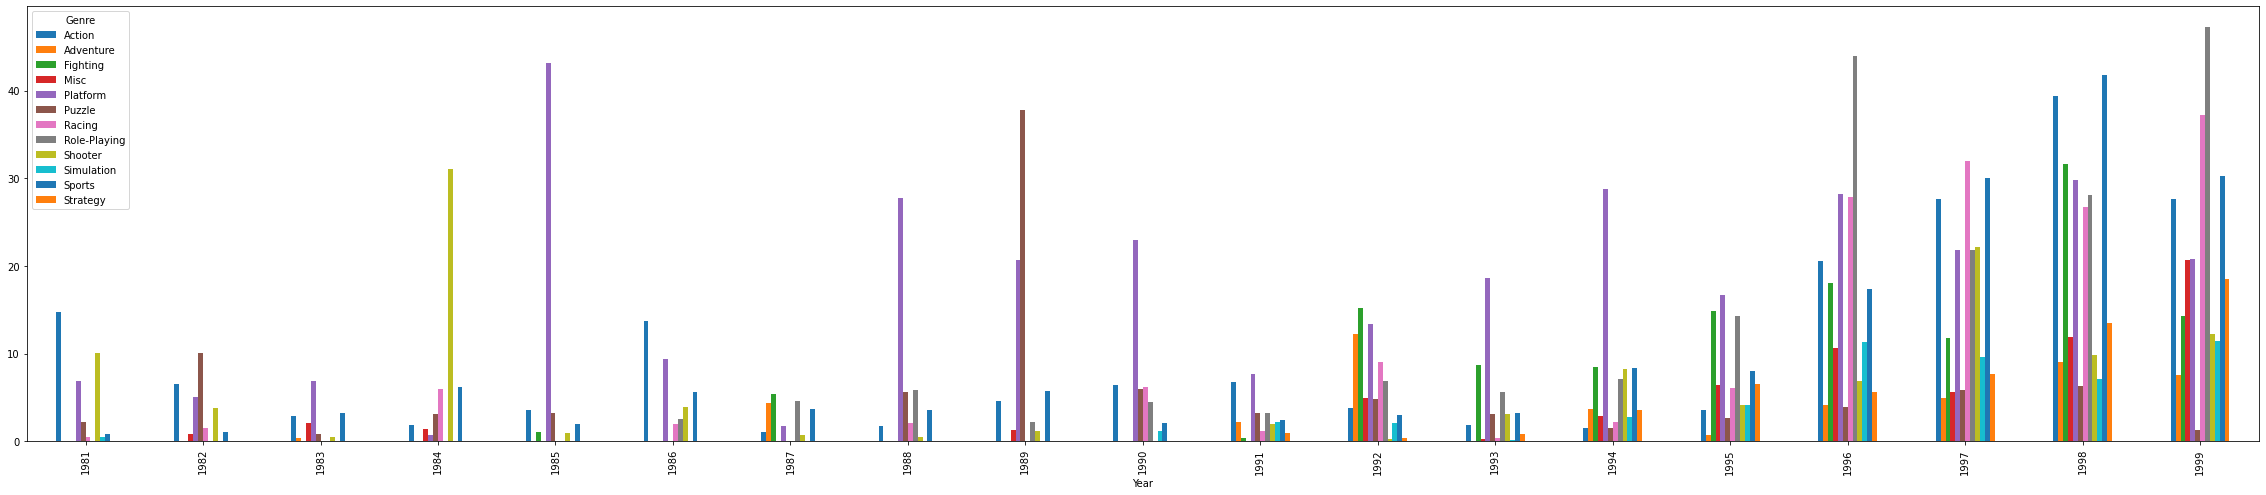

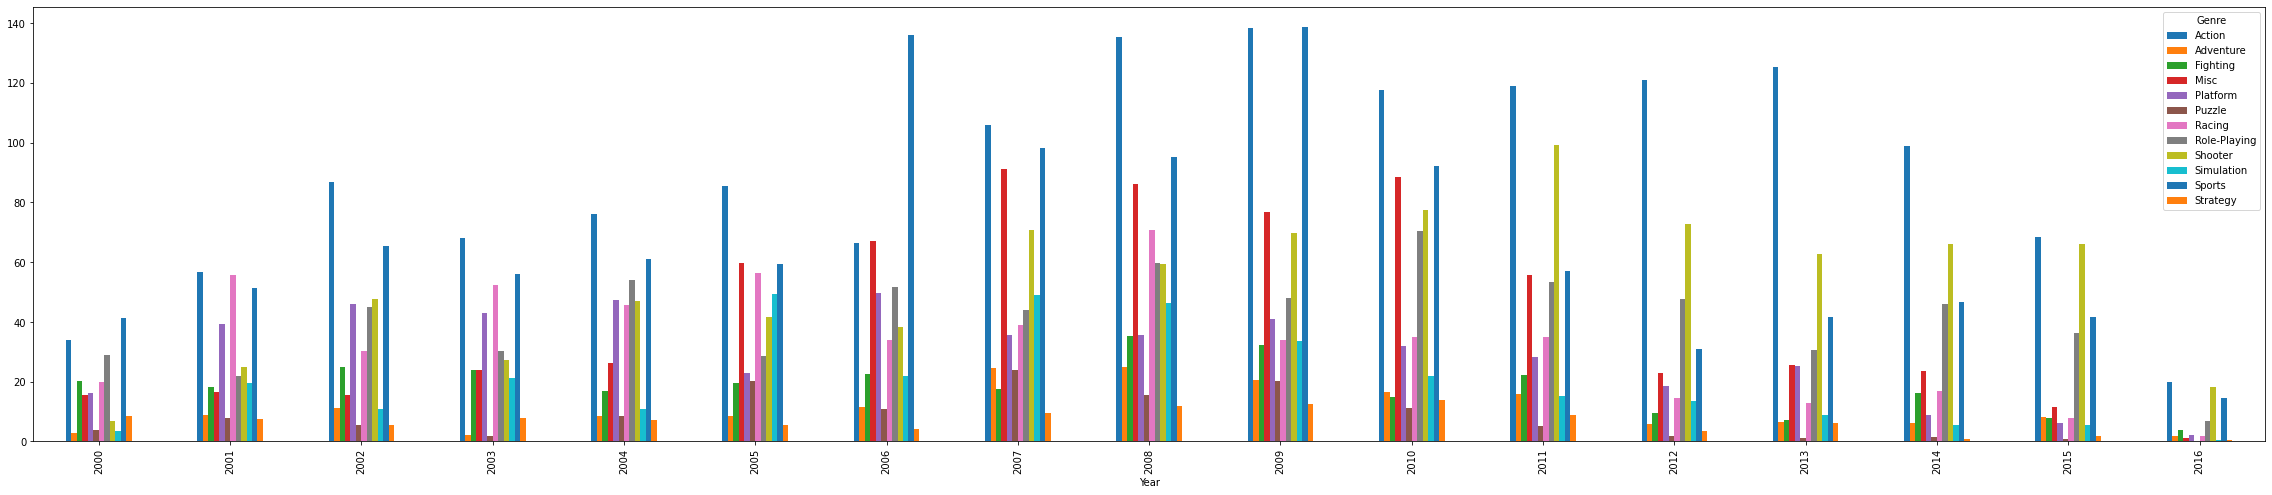

In [9]:
# 연도별 게임의 트렌드가 있을까 - 시각화

df31=pd.pivot_table(df3,index='Year',columns='Genre',values='All_Sales',aggfunc=sum)

df31=df31.fillna(0).reset_index()
indexnum=df31[(df31['Year']=='1980') | (df31['Year']=='2017') | (df31['Year']=='2020')].index
df31=df31.drop(indexnum)
df311=df31[df31['Year'].apply(int)<=1999]
df312=df31[df31['Year'].apply(int)>1999]

df311.plot(x='Year', y=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'], kind="bar",figsize=(40,8))
df312.plot(x='Year', y=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'], kind="bar",figsize=(40,8))
plt.show()


In [10]:
# 년도마다 트렌드 뽑기
ridf3=df3.reset_index()
my_list=ridf3['Year']
new_list = []
trend = []
for v in my_list:
    if v not in new_list:
        new_list.append(v)
new_list
for k in np.arange(len(new_list)):
  splitdf=df3.reindex([new_list[k]],level=0)
  max=splitdf['All_Sales'].max()
  trend.append(splitdf.index[splitdf['All_Sales']==max][0][1])
trend

df4=pd.DataFrame([new_list,trend])
df4=df4.T
df4.columns=['Year','trend']
indexnum=df4[(df4['Year']=='1980') | (df4['Year']=='2017') | (df4['Year']=='2020')].index
df4=df4.drop(indexnum)
df4.style.hide_index()

Year,trend
1981,Action
1982,Puzzle
1983,Platform
1984,Shooter
1985,Platform
1986,Action
1987,Fighting
1988,Platform
1989,Puzzle
1990,Platform


In [15]:
# 2016년 플랫폼마다 출고량이 많은 장르가 있을까?
df5=df1[['Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']][df1['Year']=='2016']
df5['All_Sales']=(df5['EU_Sales']+df5['JP_Sales']+df5['NA_Sales']+df5['Other_Sales'])*10     #스케일링
df5=df5[['Platform','Genre','All_Sales']]
df5=df5.groupby(['Platform','Genre']).sum()
df5

df51=pd.pivot_table(df5,index='Platform',columns='Genre',values='All_Sales',aggfunc=sum)
df51=df51.fillna(0)
df51

Genre,Action,Adventure,Fighting,Misc,Platform,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,
3DS,43.6,4.1,0.1,1.6,2.3,0.0,11.2,0.0,2.1,0.0,0.5
PC,1.9,1.8,0.5,0.0,0.5,1.0,3.6,11.1,0.5,1.0,4.1
PS3,9.6,1.3,0.6,1.4,0.0,0.0,4.4,0.1,0.0,8.1,0.0
PS4,81.9,6.2,23.5,2.1,16.2,8.8,35.7,122.8,1.2,94.2,0.4
PSV,17.4,3.3,1.4,2.0,0.0,0.0,7.4,0.0,0.0,2.0,0.0
WiiU,15.3,0.1,9.2,4.4,0.2,0.0,0.0,3.6,0.0,0.0,0.0
X360,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,3.2,0.0
XOne,23.8,1.1,3.2,0.0,1.6,6.9,5.2,43.9,0.1,37.8,0.2


In [16]:
from scipy.stats import chi2_contingency

print('Chi square test pvalue :',chi2_contingency(df51, correction = False)[1])

# 2016년은 플랫폼에 따라 장르의 'All_Sales' 분포가 차이가 있다.

ridf5=df5.reset_index()
my_list2=ridf5['Platform']
new_list2 = []
Genre = []
for v in my_list2:
    if v not in new_list2:
        new_list2.append(v)
new_list2
for k in np.arange(len(new_list2)):
  splitdf=df5.reindex([new_list2[k]],level=0)
  max=splitdf['All_Sales'].max()
  Genre.append(splitdf.index[splitdf['All_Sales']==max][0][1])
Genre

df6=pd.DataFrame([new_list2,Genre])
df6=df6.T
df6.columns=['Platform','Genre']
df6.style.hide_index()

# 2016년 플랫폼마다 총출고량이 많은 장르 뽑기

Chi square test pvalue : 3.607407734506654e-43


Platform,Genre
3DS,Action
PC,Shooter
PS3,Action
PS4,Shooter
PSV,Action
WiiU,Action
X360,Action
XOne,Shooter


In [12]:
# 다음 분기에 어떤 게임을 설계해야 할까
# 2014년, 2015년, 2016년 장르에 따른 지역 출고량
df6=df1[['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df6['All_Sales']=df6['EU_Sales']+df6['JP_Sales']+df6['NA_Sales']+df6['Other_Sales']
df6=df6.groupby(['Year','Genre']).sum()
df7=df6.reindex(['2014'],level=0)
df8=df6.reindex(['2015'],level=0)
df9=df6.reindex(['2016'],level=0)
df7
normalization_df7 = (df7 - df7.mean())/df7.std()
normalization_df7

NA_Sales  EU_Sales  JP_Sales  Other_Sales  All_Sales
Year Genre                                                             
2014 Action        2.195808  2.456046  0.654775     2.440132   2.326451
     Adventure    -0.717156 -0.684103 -0.393137    -0.650130  -0.721685
     Fighting     -0.325224 -0.605538  0.308189    -0.476273  -0.391678
     Misc         -0.124112 -0.130874 -0.189263    -0.064891  -0.143025
     Platform     -0.631644 -0.559708 -0.413524    -0.581567  -0.630490
     Puzzle       -0.821671 -0.826502 -0.586817    -0.792155  -0.872255
     Racing       -0.406778 -0.226625 -0.372749    -0.402811  -0.373308
     Role-Playing  0.202894  0.062266  2.940200     0.011019   0.583581
     Shooter       1.561591  1.255473 -0.450221     1.235370   1.243267
     Simulation   -0.774164 -0.575258 -0.594972    -0.691758  -0.739727
     Sports        0.698549  0.673600 -0.344207     0.779912   0.608512
     Strategy     -0.858093 -0.838778 -0.558274    -0.806847  -0.889641

In [13]:
df8
normalization_df8 = (df8 - df8.mean())/df8.std()
normalization_df8

NA_Sales  EU_Sales  JP_Sales  Other_Sales  All_Sales
Year Genre                                                             
2015 Action        1.313720  1.774037  2.906981     1.518915   1.872853
     Adventure    -0.563586 -0.529266 -0.397294    -0.547192  -0.557012
     Fighting     -0.480894 -0.639214 -0.454186    -0.493176  -0.566290
     Misc         -0.361778 -0.489999 -0.156073    -0.483048  -0.409784
     Platform     -0.589181 -0.703164 -0.340403    -0.682232  -0.636072
     Puzzle       -0.830366 -0.893890 -0.515629    -0.830775  -0.852275
     Racing       -0.641355 -0.374441 -0.570245    -0.520184  -0.560642
     Role-Playing  0.478925  0.498413  0.893011     0.465606   0.589349
     Shooter       2.195769  1.812182 -0.021809     2.005058   1.786936
     Simulation   -0.724048 -0.624629 -0.274408    -0.702488  -0.653820
     Sports        0.981968  0.966254 -0.470116     1.063156   0.793451
     Strategy     -0.779176 -0.796283 -0.599829    -0.793639  -0.806695

In [14]:
df9
normalization_df9 = (df9 - df9.mean())/df9.std()
normalization_df9

NA_Sales  EU_Sales  JP_Sales  Other_Sales  All_Sales
Year Genre                                                             
2016 Action        1.446079  1.280096  2.511014     1.259598   1.800238
     Adventure    -0.652823 -0.665828 -0.162001    -0.665410  -0.624709
     Fighting     -0.174592 -0.418106 -0.333561    -0.273693  -0.347956
     Misc         -0.698369 -0.763613 -0.239480    -0.754945  -0.710691
     Platform     -0.482026 -0.509372 -0.626873    -0.441572  -0.585749
     Racing       -0.656619 -0.421365 -0.682215    -0.575874  -0.640831
     Role-Playing -0.254297 -0.372472  1.321163    -0.296077   0.041647
     Shooter       2.041970  1.716870 -0.350163     1.919921   1.575880
     Simulation   -0.781870 -0.763613 -0.521723    -0.788521  -0.812794
     Sports        0.952666  1.606047 -0.256082     1.360325   1.100295
     Strategy     -0.740119 -0.688644 -0.660078    -0.743753  -0.795329

In [17]:
# 2015년부터 JP 지역에서 'Action' 장르가 'Role-Playing' 장르를 넘어선 것을 알 수 있다.
# 해마다 'Action' 장르의 비율이 줄고 있음을 알 수 있지만, 여전히 top1 이므로
# 모든 지역을 상대로 게임을 출시한다면 'Action' 장르의 게임을 설계하는 것이 좋다.
# JP 지역을 제외한 지역을 상대로 게임을 출시한다면 'Shooter' 장르의 게임을 설계하는 것이 좋다.
# JP 지역만을 상대로 게임을 출시한다면 상승세인 'Role-Playing' 장르로 설계해도 좋다.
# EU 지역과 기타 지역을 상대로 게임을 출시한다면 'Action' 장르를 넘어서고 상승세인 'Sports' 장르로 설계해도 좋다.
# 즉 , JP 지역은 'Action','Role-Playing' 순이로 NA 지역은 'Shooter','Action' 순으로 EU 지역은 'Shooter','Action','Sports' 순으로 기타 지역은 'Shooter','Action','Sports' 순으로 설계하는 것이 좋다.

In [37]:
# 설명을 편하게 하기 위한 데이터프레임
ndf7=normalization_df7[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2014','Action'),('2014','Role-Playing')]]
ndf8=normalization_df8[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2015','Action'),('2015','Role-Playing')]]
ndf9=normalization_df9[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2016','Action'),('2016','Role-Playing')]]
pd.concat([ndf7,ndf8,ndf9])

JP_Sales  NA_Sales  EU_Sales  Other_Sales
Year Genre                                                  
2014 Action        0.654775  2.195808  2.456046     2.440132
     Role-Playing  2.940200  0.202894  0.062266     0.011019
2015 Action        2.906981  1.313720  1.774037     1.518915
     Role-Playing  0.893011  0.478925  0.498413     0.465606
2016 Action        2.511014  1.446079  1.280096     1.259598
     Role-Playing  1.321163 -0.254297 -0.372472    -0.296077

In [36]:
ndf7=normalization_df7[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2014','Action'),('2014','Shooter')]]
ndf8=normalization_df8[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2015','Action'),('2015','Shooter')]]
ndf9=normalization_df9[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2016','Action'),('2016','Shooter')]]
pd.concat([ndf7,ndf8,ndf9])

JP_Sales  NA_Sales  EU_Sales  Other_Sales
Year Genre                                             
2014 Action   0.654775  2.195808  2.456046     2.440132
     Shooter -0.450221  1.561591  1.255473     1.235370
2015 Action   2.906981  1.313720  1.774037     1.518915
     Shooter -0.021809  2.195769  1.812182     2.005058
2016 Action   2.511014  1.446079  1.280096     1.259598
     Shooter -0.350163  2.041970  1.716870     1.919921

In [38]:
ndf7=normalization_df7[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2014','Action'),('2014','Sports')]]
ndf8=normalization_df8[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2015','Action'),('2015','Sports')]]
ndf9=normalization_df9[['JP_Sales','NA_Sales','EU_Sales','Other_Sales']].loc[[('2016','Action'),('2016','Sports')]]
pd.concat([ndf7,ndf8,ndf9])

JP_Sales  NA_Sales  EU_Sales  Other_Sales
Year Genre                                            
2014 Action  0.654775  2.195808  2.456046     2.440132
     Sports -0.344207  0.698549  0.673600     0.779912
2015 Action  2.906981  1.313720  1.774037     1.518915
     Sports -0.470116  0.981968  0.966254     1.063156
2016 Action  2.511014  1.446079  1.280096     1.259598
     Sports -0.256082  0.952666  1.606047     1.360325